In [2]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')


[]

In [3]:
from pandas import read_csv
#Load data set
series_influ_A_df = read_csv('../data/vietnam_flu_A.csv', usecols=[1], engine='python')
# series_influ_A_df = series_influ_A_df["Influenza A - All types of surveillance"]
series_influ_A_df = series_influ_A_df.dropna()
series_influ_A_df = series_influ_A_df.astype('float32')
series_influ_A_df = series_influ_A_df.values
# normalize the dataset
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(series_influ_A_df)
# Create Training and Test
train = dataset[:735, :]
test = dataset[735:, :]

In [4]:
import numpy as np
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [5]:
look_back = 2
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [6]:
print(trainX.shape)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))


(732, 2)


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100


d:\my_study\gr3\DATN\venv\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


732/732 - 2s - 3ms/step - loss: 0.0119
Epoch 2/100
732/732 - 1s - 898us/step - loss: 0.0071
Epoch 3/100
732/732 - 1s - 946us/step - loss: 0.0060
Epoch 4/100
732/732 - 1s - 943us/step - loss: 0.0058
Epoch 5/100
732/732 - 1s - 942us/step - loss: 0.0057
Epoch 6/100
732/732 - 1s - 922us/step - loss: 0.0055
Epoch 7/100
732/732 - 1s - 985us/step - loss: 0.0054
Epoch 8/100
732/732 - 1s - 1ms/step - loss: 0.0052
Epoch 9/100
732/732 - 1s - 1ms/step - loss: 0.0051
Epoch 10/100
732/732 - 1s - 1ms/step - loss: 0.0051
Epoch 11/100
732/732 - 1s - 1ms/step - loss: 0.0050
Epoch 12/100
732/732 - 1s - 1ms/step - loss: 0.0050
Epoch 13/100
732/732 - 1s - 1ms/step - loss: 0.0049
Epoch 14/100
732/732 - 1s - 1ms/step - loss: 0.0048
Epoch 15/100
732/732 - 1s - 962us/step - loss: 0.0049
Epoch 16/100
732/732 - 1s - 974us/step - loss: 0.0048
Epoch 17/100
732/732 - 1s - 944us/step - loss: 0.0049
Epoch 18/100
732/732 - 1s - 1ms/step - loss: 0.0048
Epoch 19/100
732/732 - 1s - 1ms/step - loss: 0.0049
Epoch 20/100
73

In [12]:
from sklearn.metrics import mean_squared_error
# make predictions
testPredict = model.predict(testX)
# invert predictions
testPredict = scaler.inverse_transform(testPredict)
testY_ = scaler.inverse_transform([testY])
print(testPredict[:,0], testY_[0])
# calculate root mean squared error
testScore = np.sqrt(mean_squared_error(testY_[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
[14.28364    24.079576   18.2762     13.412246   13.474497   16.079977
 12.656152   14.960461   13.993677    6.272815    6.502076    1.9958731
  0.663158    3.6049068   1.3817519   0.663158   -0.0363972  -0.20306984
 -0.20306984  0.502348    0.663158    2.8479347   1.1910757   2.1053169
  1.0076579   2.8479347   3.321212    2.5973055   4.658119    4.3994083
  7.2882466   6.4165964   7.59009     3.563157    2.425742    7.0165424
 16.212934    5.9748945   5.4302883  14.243117   23.249643   28.513676
 25.100943   27.654346   26.513283   35.74832    34.812504   19.35579
 13.032004    9.60715     3.776923    1.0076579   2.8479347   1.1910757 ] [26.99999969 18.00000061 13.99999939 14.99999969 18.00000061 13.00000031
 17.00000031 14.99999969  5.          8.          1.          1.
  5.          1.          1.          0.          0.          0.
  1.          1.          4.          1.          3.          1.
  4.          4.          3.          6.       

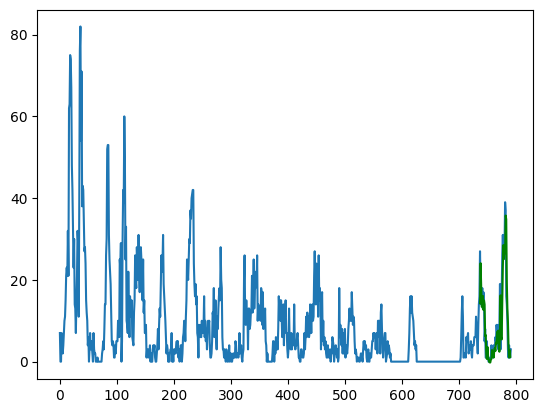

In [9]:
import matplotlib.pyplot as plt
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainX)+(look_back*2)+1:len(dataset)-1, :] = testPredict
plt.plot(scaler.inverse_transform(dataset))
plt.plot(testPredictPlot, color = 'green')
plt.show()

In [10]:
# model.save("../model/LSTM.keras")